# Data Analysis - Introduction to Pandas

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#summary)
1. [Series](#series)\
    1.1. [Creation: `pd.Series()` ](#s_creation)\
&nbsp; &nbsp; &nbsp; &nbsp; 1.1.1. [Time indexes: `pd.date_range()`  ](#s_time_index)\
    1.2. [Basic plotting: `.plot()` and `.plot.bar()`  ](#s_plot)\
    1.3. [Indexing and Slicing ](#s_selection)\
&nbsp; &nbsp; &nbsp; &nbsp; [1.3.1. Conditional Selection: filtering rows with Comparison and Logical operators ](#s_conditional_selection)\
    1.4. [Basic Analytics ](#s_analytics)\
&nbsp; &nbsp; &nbsp; &nbsp; 1.4.1. [_Vectorized_ operations ](#s_basic_operations)\
&nbsp; &nbsp; &nbsp; &nbsp; 1.4.2. [Built-in methods ](#s_builtin_methods)\
&nbsp; &nbsp; &nbsp; &nbsp; 1.4.3. [Interoperability with NumPy's universal functions ](#s_ufunc)\
    1.5. [Data Alignment ](#s_data_alignment)\
    1.6. [_Excursus:_ Returns time-series  ](#s_ret)\
&nbsp; &nbsp; &nbsp; &nbsp; 1.6.1. [Step-by-step computation  ](#s_ret_stepbystep)\
&nbsp; &nbsp; &nbsp; &nbsp; 1.6.2. [Direct computation using `.shift()`  ](#s_ret_shift)


### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Sec. 5.The DataFrame Class, 5.Basic Analytics, 5.Basic Visualization, 5.The Series Class, 5.Complex Selection, 5.Concatenation, Joining, and Merging, 5.Performance Aspects.


- _[Pandas - Intro to data structures](https://pandas.pydata.org/docs/getting_started/dsintro.html#intro-to-data-structures)_ ([Series](https://pandas.pydata.org/docs/getting_started/dsintro.html#series); [DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe)). From _[Pandas - Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html):_ 
    - [What kind of data does pandas handle?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html), 
    - _[How do I select a subset of a `DataFrame`?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html),_ 
    - _[How to create plots in pandas?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html),_ _[How to create new columns derived from existing columns](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html),_ 
    - _[How to calculate summary statistics?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html),_ 
    - _[How to combine data from multiple tables?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html)_

# Executive Summary <a name="summary"></a>

**TODO**

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for Matplotlib plotting
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Series <a name="series"></a>

A [Pandas Series](https://pandas.pydata.org/docs/getting_started/dsintro.html#series) is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 

We can see it as a 1-dim NumPy array with an enhanced indexing. 

## 1.1. Creation: `pd.Series()` <a name="s_creation"></a>

Series can be created using the constructor:

`
pd.Series(data[, index, name])
`

where:
- `data`: is the data content of the series. It can be a Python dict, a NumPy 1-dim array or a scalar value (like 17).
- `index`: is the index of the series. It can be an array-like structure (e.g. a list) of the length of `data`. If not provided, default is `[0,1,...,len(data)-1]`.
- `name`: an optional `str` representing the name of the series.

Here we consider the creation of a Pandas series from a NumPy array. We refer to [Intro to data structures - Series](https://pandas.pydata.org/docs/getting_started/dsintro.html#series) for other creational paradigms and full details.

So, let's define a simple vector

In [2]:
arr = np.linspace(0.0, 1.0, 11)
arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

we pass the vector `arr` as the `data` parameter of `pd.Series()`

In [3]:
s = pd.Series(data=arr)
s

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
5     0.5
6     0.6
7     0.7
8     0.8
9     0.9
10    1.0
dtype: float64

The function `pd.Series()` returns a Pandas series object. Each element `0.0, 0.1, ..., 1.0` is linked to its corresponding index. Notice that the `index` which is generated by default (since we didn't provide one explicitly) is `0, 1,..., 10 = len(arr)-1`.

In [4]:
type(s)

pandas.core.series.Series

Notice that the explicit assignment `data=arr` is optional and equivalent to `pd.Series(arr)`.

Similarly to NumPy arrays, Pandas series also have meta-informative attributes. Let's have a look at some of them.

Similarly to NumPy arrays, the number of elements is given by

In [5]:
s.size

11

the data-type of the `data` stored

In [6]:
s.dtype

dtype('float64')

and, differently from arrays, you can directly access the index sequence:

In [7]:
s.index

RangeIndex(start=0, stop=11, step=1)

`RangeIndex` is the kind of `[0,1,...,len(data)-1]` index which Pandas creates by default when you don't input one explicitly.

You can give a name to the series, which is stored in the `.name` attribute of the series

In [8]:
s.name = "Dummy Series"
s

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
5     0.5
6     0.6
7     0.7
8     0.8
9     0.9
10    1.0
Name: Dummy Series, dtype: float64

If you want just the values (without the indexing) - that is, the original NumPy `arr` in our case - these can be accessed through the `.values` attribute

In [9]:
s.values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### 1.1.1. Time indexes: `pd.date_range()`  <a name="s_time_index"></a>

Pandas series are the usual way to represent financial (and non-financial) time-series, which are sequences of values (prices, returns, spreads,...) indexed by a time index (calendar days, business days, etc.). 

Pandas has a built-in constructor for time-indexes, which is `pd.date_range()`, which can be passed as the `index` parameter to `pd.Series()`.

Here we create a range of business days (denoted by the _frequency_ `freq='B'`) starting from Jan 1st 2020. The range lasts a number of `periods` equal to the size of the number of data that we need to index (`arr.size`)

In [10]:
dates = pd.date_range('2020-01-01', periods=arr.size, freq='B') 
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='B')

The kind of time-index that is returned is called a `DatetimeIndex`. As said, we can use the defined index in the series definition

In [11]:
s = pd.Series(data=arr, index=dates, name="Dummy Series")
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

as seen before, the index is stored as the `.index` attribute of the series

In [12]:
s.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='B')

## 1.2. Basic plotting: `.plot()` and `.plot.bar()`  <a name="s_plot"></a>

Plotting Series is as easy as it could be

In [13]:
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

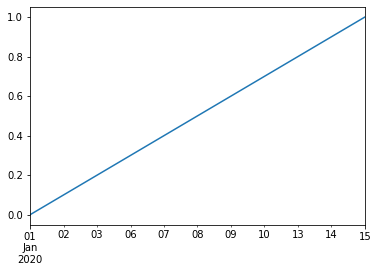

In [14]:
s.plot()

Besides the standard `.plot()`, there are tons of different plotting styles which can be called directly as a suffix of `.plot`. For example, a simple bar-plot of the series `s` can be drawn as

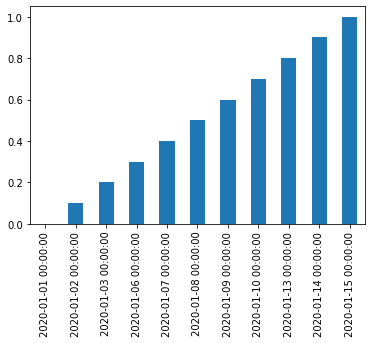

In [15]:
s.plot.bar()

## 1.3. Indexing and Slicing <a name="s_selection"></a>

A Series `s` can be indexed by the square brackets `s[]`. You can refer to elements or slices of the series according to two ways of indexing:

&nbsp;  | Indexing | Slicing
:--- | :---: | :---:
like a NumPy array  | `s[i]` | `s[i:j:k]`  |
like a Python dict  | `s[indexLabel]` | `s[indexLabelStart:indexLabelEnd:k]`  |

In [16]:
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

You can rever to the second element as 

In [17]:
s[1]

0.1

A single value is returned.

You can then slice the series as 

In [18]:
s[7:]

2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

and a `pd.Series` is returned. Notice that the index gets sliced too.

An example with the step parameter

In [19]:
s[7::2] # from index 7 to the end, each two elements

2020-01-10    0.7
2020-01-14    0.9
Freq: 2B, Name: Dummy Series, dtype: float64

Notice here, how the `Freq` description gets changed from 'B' (business-day) to '2B' (each two bd).

Alternatively, you can slice `s` using the Strings that represent the labels `indexLabel` of the indexes. That is, as if the series was a dict and the index labels the  keys

In [20]:
s['2020-01-08']

0.5

and you can slice too using the index labels

In [21]:
s['2020-01-08':'2020-01-13']

2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
Freq: B, Name: Dummy Series, dtype: float64

You can use the step parameter in the label-way of indexing too (notice the '2B' frequency as before)

In [22]:
s['2020-01-08':'2020-01-13':2]

2020-01-08    0.5
2020-01-10    0.7
Freq: 2B, Name: Dummy Series, dtype: float64

Similarly to Python dicts, you can check whether an index is among the series indexes simply

In [23]:
'2020-01-12' in s

False

as one would expect a `KeyError` is raised if you try to select an element of the series using a label which is not an index

In [24]:
# KeyError raised if you ask for a label that is not contained
# s['2020-01-12']

whereas if you use a label which is not an index in to slice the series - but that still is time-range of the `DatetimeIndex` index - well Pandas is smart enough to return you the relevant slice of the series anyway.

That is, this

In [25]:
s['2020-01-12':]

2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

is equivalent to this

In [26]:
s['2020-01-13':]

2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

### 1.3.1. Conditional Selection: filtering rows with Comparison and Logical operators <a name="s_conditional_selection"></a>

Comparison (`<`, `<=`, `>`, `>=`, `==`) and logical operators (`&` for logical _and,_ `|` for logical _or,_ `!` for logical _not_ ) work on whole series at once. For example:

In [27]:
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

we can select the elements greater than a given threshold (0.5)

In [28]:
s > 0.5

2020-01-01    False
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
2020-01-09     True
2020-01-10     True
2020-01-13     True
2020-01-14     True
2020-01-15     True
Freq: B, Name: Dummy Series, dtype: bool

which returns the same series with original values substituted by boolean values, which can be used for index purposes:

In [29]:
s[s > 0.5]

2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

Of course you can have also more complex conditional selections selections: let's ask for the slice of the series which is at most 0.2 and greater than 0.5

In [30]:
s[(s <= 0.2) | (s > 0.5)]

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Name: Dummy Series, dtype: float64

## 1.4. Basic Analytics <a name="s_analytics"></a>

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

### 1.4.1. _Vectorized_ operations <a name="s_basic_operations"></a>

Series-Number and Series-Series operations are vectorized:

In [31]:
s * 2

2020-01-01    0.0
2020-01-02    0.2
2020-01-03    0.4
2020-01-06    0.6
2020-01-07    0.8
2020-01-08    1.0
2020-01-09    1.2
2020-01-10    1.4
2020-01-13    1.6
2020-01-14    1.8
2020-01-15    2.0
Freq: B, Name: Dummy Series, dtype: float64

In [32]:
s + 10*s

2020-01-01     0.0
2020-01-02     1.1
2020-01-03     2.2
2020-01-06     3.3
2020-01-07     4.4
2020-01-08     5.5
2020-01-09     6.6
2020-01-10     7.7
2020-01-13     8.8
2020-01-14     9.9
2020-01-15    11.0
Freq: B, Name: Dummy Series, dtype: float64

### 1.4.2. Built-in methods <a name="s_builtin_methods"></a>

There are tons of built-in methods

In [33]:
s.sum()

5.500000000000001

In [34]:
s.cumsum()

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.3
2020-01-06    0.6
2020-01-07    1.0
2020-01-08    1.5
2020-01-09    2.1
2020-01-10    2.8
2020-01-13    3.6
2020-01-14    4.5
2020-01-15    5.5
Freq: B, Name: Dummy Series, dtype: float64

### 1.4.3. Interoperability with NumPy's universal functions <a name="s_ufunc"></a>

Most of NumPy universal functions, which expect NumPy arrays in input, work with Pandas series in input as well

In [35]:
np.exp(s)

2020-01-01    1.000000
2020-01-02    1.105171
2020-01-03    1.221403
2020-01-06    1.349859
2020-01-07    1.491825
2020-01-08    1.648721
2020-01-09    1.822119
2020-01-10    2.013753
2020-01-13    2.225541
2020-01-14    2.459603
2020-01-15    2.718282
Freq: B, Name: Dummy Series, dtype: float64

## 1.5. Data Alignment <a name="s_data_alignment"></a>

NumPy arrays are all indexed by the same `0,1,...,len(array)-1` indexing. As we have seen Pandas Series offer the possibility to the user to define his or her own indexing. This means that you can have two series which are _unaligned_. For example:

In [36]:
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

In [37]:
s1 = s[s <= 0.6]
s1

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
Freq: B, Name: Dummy Series, dtype: float64

In [38]:
s2 = s[s >= 0.4]
s2

2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

This raises the question about how to define an operation such as `s1 + s2`

In [39]:
s1 + s2

2020-01-01    NaN
2020-01-02    NaN
2020-01-03    NaN
2020-01-06    NaN
2020-01-07    0.8
2020-01-08    1.0
2020-01-09    NaN
2020-01-10    NaN
2020-01-13    NaN
2020-01-14    NaN
2020-01-15    NaN
Freq: B, Name: Dummy Series, dtype: float64

well, given two unaligned series `s1` and `s2`, Pandas chose to index any combination of the two according to the _union_ of their indexes (here `s1` has indexes from `2020-01-01` to `2020-01-08` whereas `s2` has indexes from `2020-01-07` to `2020-01-15`).

The `+` operator is applied to each element corresponding to indexes in common between the two series (here indexes `2020-01-07` and `2020-01-08`). The rest of indexes (in the union of the indexes) are either not found in `s1` or in `s2`. Accordingly, their corresponding values in the `s1 + s2` series will be marked as _missing_ and denoted by `NaN` (which stands for Not-A-Number). 

Of course this generalizes to any other operation:

In [40]:
s3 = s1 * s2
s3

2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-06     NaN
2020-01-07    0.16
2020-01-08    0.25
2020-01-09     NaN
2020-01-10     NaN
2020-01-13     NaN
2020-01-14     NaN
2020-01-15     NaN
Freq: B, Name: Dummy Series, dtype: float64

What is cool (and really helps data analysis a lot) is that most basic analytics still warks disregarding NaNs. That is, `NaN` are not counted.

In [41]:
s3 ** 2

2020-01-01       NaN
2020-01-02       NaN
2020-01-03       NaN
2020-01-06       NaN
2020-01-07    0.0256
2020-01-08    0.0625
2020-01-09       NaN
2020-01-10       NaN
2020-01-13       NaN
2020-01-14       NaN
2020-01-15       NaN
Freq: B, Name: Dummy Series, dtype: float64

In [42]:
s3.sum()

0.41000000000000003

In [43]:
s3.mean()

0.20500000000000002

In [44]:
s3.std()

0.06363961030678926

In [45]:
s3.cumsum()

2020-01-01     NaN
2020-01-02     NaN
2020-01-03     NaN
2020-01-06     NaN
2020-01-07    0.16
2020-01-08    0.41
2020-01-09     NaN
2020-01-10     NaN
2020-01-13     NaN
2020-01-14     NaN
2020-01-15     NaN
Freq: B, Name: Dummy Series, dtype: float64

## 1.6. _Excursus:_ Returns time-series  <a name="s_ret"></a>

A typical example of _unaligned_ time series is encountered when computing the time-series of the returns of an underlying time-series.

Let's simulate a time-series $p_t$ as a time-series of i.i.d. (independent and identically distributed) [log-normal](https://en.wikipedia.org/wiki/Log-normal_distribution) random numbers.

Let's begin recalling the relation between normal and log-normal random variables. The random variable $X$ is log-normally distributed if the logarithm $\ln(X)$ of $X$ is normally distributed.

Therefore, if the variable $Y=\ln(X)$ is normally distributed with mean $E[Y] = \mu$ and variance $Var[Y] = \sigma^2$, that is

$$
Y=\ln(X) \sim \mathcal{N}(\mu, \sigma^2)
$$

then, $X=e^Y$ is log-normally distributed as

$$
X =e^Y \sim \ln \mathcal{N}(\mu, \sigma^2)
$$

with mean $E[X]$ and variance $Var[X]$ which are related to the first two moments of $Y$ as follows (check [Wikipedia](https://en.wikipedia.org/wiki/Log-normal_distribution#Arithmetic_moments)):

\begin{equation}
\begin{aligned}
E[X] &= \exp{\left( \mu + \frac{1}{2} \sigma^2 \right)} \nonumber \\
Var[X] &= \left[ \exp{(\sigma^2 )} - 1 \right] \exp{\left( 2\mu + \sigma^2 \right)} \nonumber 
\end{aligned}
\end{equation}

We shall use NumPy's [`random.lognormal` function](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.lognormal.html) which expects in input the mean $\mu$ and standard-deviation $\sigma$ of the underlying normal random variable $Y$ and returns a NumPy array of i.i.d. log-normal random variables in output.

**Warning** Notice that this a very _elementary_ time-series simulation. In particular, notice that this is **not** a simulation of a Geometric Brownian Motion (GBM). Intuitivelly, even we are sampling each $p_t$ from a log-normal distribution, we are sampling them as i.i.d. random variables. Whereas, each subsequent number of a GBM, depends on the previous one. Stochastic process simulation will be covered in a future lesson. 

In [46]:
length = 20 # number of prices to simulate

In [47]:
# we set the seed to have reproducible results. This has to be in the same code-cell of the number extraction, 
# otherwise Jupyter will forget it and reset it.
seed = np.random.seed(987654321) 

mu, sigma = np.log(30.), np.log(1.1) # mean and std-dev of the underlying normal random variable (\mu and \sigma above)

p = np.random.lognormal(mu, sigma, length)

and plot it using a business-day date range on the x-axis starting from Jan 1st to Jan 28th 2020 (we can use the `DatetimeIndex` returned by `pd.date_range()` in the Matplotlib plot function)

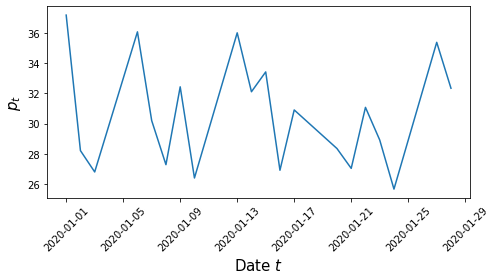

In [48]:
fig, ax = plt.subplots(figsize=(7,4))

plt.plot(pd.date_range('2020-01-01', periods=length, freq='B'), p) 

ax.set_xlabel('Date $t$', fontsize=15) 
ax.set_ylabel('$p_t$', fontsize=15) 

plt.xticks(rotation=45) # to rotate of 45 degrees the x-ticks 

fig.tight_layout()
plt.show()

### 1.6.1. Step-by-step computation  <a name="s_ret_stepbystep"></a>

To compute the returns, we need to calculate:
- $p_{t}$ as the Series `p_t` of values `p[1:]` from the second to the end;
- $p_{t-1}$ as the Series `p_tm1` of values `p[:-1]` from the beginning to the second-last one.

To be consistent with the following returns calculation, we define the two `p_t` and `p_tm1` time-series as aligned time-series indexed by business-day date range from Jan 2nd 2020 (that is, with one day of lag w.r.t. the original time series).

In [49]:
p_t = pd.Series(data=p[1:],
                  index=pd.date_range('2020-01-02', periods=length-1, freq='B'), 
                  name="p(t)")
p_t

2020-01-02    28.208823
2020-01-03    26.799693
2020-01-06    36.056879
2020-01-07    30.191651
2020-01-08    27.280371
2020-01-09    32.424250
2020-01-10    26.400751
2020-01-13    35.992138
2020-01-14    32.099097
2020-01-15    33.409345
2020-01-16    26.912392
2020-01-17    30.896827
2020-01-20    28.347494
2020-01-21    27.036349
2020-01-22    31.067052
2020-01-23    28.911740
2020-01-24    25.666152
2020-01-27    35.364221
2020-01-28    32.330933
Freq: B, Name: p(t), dtype: float64

In [50]:
p_t.size

19

In [51]:
p_tm1 = pd.Series(data=p[:-1],
                  index=pd.date_range('2020-01-02', periods=length-1, freq='B'), 
                  name="p(t-1)")
p_tm1

2020-01-02    37.163108
2020-01-03    28.208823
2020-01-06    26.799693
2020-01-07    36.056879
2020-01-08    30.191651
2020-01-09    27.280371
2020-01-10    32.424250
2020-01-13    26.400751
2020-01-14    35.992138
2020-01-15    32.099097
2020-01-16    33.409345
2020-01-17    26.912392
2020-01-20    30.896827
2020-01-21    28.347494
2020-01-22    27.036349
2020-01-23    31.067052
2020-01-24    28.911740
2020-01-27    25.666152
2020-01-28    35.364221
Freq: B, Name: p(t-1), dtype: float64

In [52]:
p_tm1.size

19

We can define the linear returns 

$$
r^{\text{lin}}_t = p_t - p_{t-1}
$$

as the `linRet_t = p_t - p_tm1` Pandas series

In [53]:
linRet_t = p_t - p_tm1
linRet_t.name = "linear returns r(t) = p(t) - p(t-1)"
linRet_t

2020-01-02   -8.954285
2020-01-03   -1.409130
2020-01-06    9.257186
2020-01-07   -5.865228
2020-01-08   -2.911280
2020-01-09    5.143879
2020-01-10   -6.023500
2020-01-13    9.591387
2020-01-14   -3.893041
2020-01-15    1.310247
2020-01-16   -6.496952
2020-01-17    3.984435
2020-01-20   -2.549333
2020-01-21   -1.311146
2020-01-22    4.030703
2020-01-23   -2.155312
2020-01-24   -3.245588
2020-01-27    9.698069
2020-01-28   -3.033288
Freq: B, Name: linear returns r(t) = p(t) - p(t-1), dtype: float64

In [54]:
linRet_t.size

19

and we can do a bar-plot of returns

Text(0, 0.5, '$r_t = p_t - p_{t-1}$')

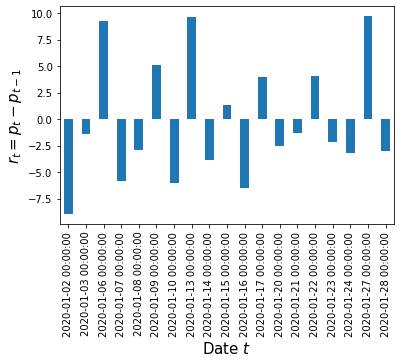

In [55]:
ax = linRet_t.plot.bar() 

ax.set_xlabel("Date $t$", fontsize=15)
ax.set_ylabel("$r_t = p_t - p_{t-1}$", fontsize=15)

We can, alternatively, compute log-returns

$$
r^{log}_t = \log \left( \frac{p_t}{p_{t-1}} \right)
$$

as the `logRet_t = log(p_t) - log(p_tm1)` Pandas series

In [56]:
logRet_t = np.log(p_t) - np.log(p_tm1)
logRet_t.name = "log-returns r(t) = log(p(t)/p(t-1))"
logRet_t

2020-01-02   -0.275682
2020-01-03   -0.051244
2020-01-06    0.296707
2020-01-07   -0.177532
2020-01-08   -0.101398
2020-01-09    0.172739
2020-01-10   -0.205514
2020-01-13    0.309908
2020-01-14   -0.114473
2020-01-15    0.040008
2020-01-16   -0.216249
2020-01-17    0.138067
2020-01-20   -0.086115
2020-01-21   -0.047356
2020-01-22    0.138966
2020-01-23   -0.071900
2020-01-24   -0.119075
2020-01-27    0.320528
2020-01-28   -0.089676
Freq: B, Name: log-returns r(t) = log(p(t)/p(t-1)), dtype: float64

In [57]:
logRet_t.size

19

and we can do a bar-plot of returns

Text(0, 0.5, '$r_t = \\ln(p_t/p_{t-1})$')

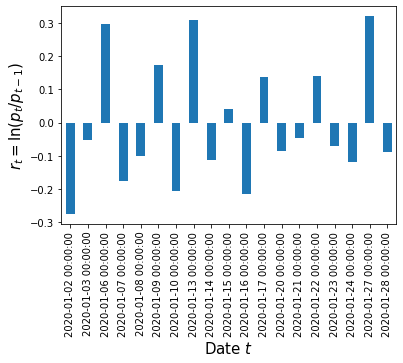

In [58]:
ax = logRet_t.plot.bar() 

ax.set_xlabel("Date $t$", fontsize=15)
ax.set_ylabel("$r_t = \ln(p_t/p_{t-1})$", fontsize=15)

### 1.6.2. Direct computation using `.shift()`  <a name="s_ret_shift"></a>

We first (an more intuitively) define the $p_t$ time-series as a Pandas Series out of the original (NumPy array) time-series `p`, using the whole indexing form Jan 1st 2020.

In [59]:
p_t = pd.Series(data=p,
                  index=pd.date_range('2020-01-01', periods=length, freq='B'), 
                  name="p(t)")
p_t

2020-01-01    37.163108
2020-01-02    28.208823
2020-01-03    26.799693
2020-01-06    36.056879
2020-01-07    30.191651
2020-01-08    27.280371
2020-01-09    32.424250
2020-01-10    26.400751
2020-01-13    35.992138
2020-01-14    32.099097
2020-01-15    33.409345
2020-01-16    26.912392
2020-01-17    30.896827
2020-01-20    28.347494
2020-01-21    27.036349
2020-01-22    31.067052
2020-01-23    28.911740
2020-01-24    25.666152
2020-01-27    35.364221
2020-01-28    32.330933
Freq: B, Name: p(t), dtype: float64

Then we define the $p_{t-1}$ time-series as the `p_tm1` Series rolling the `p_t` Series shifted of 1 business-day using the `.shift()` method. What was indexed by date $t$ in `p_t` Series is rolled ahead of 1 bd, becoming indexed by date $t+1$ in `p_tm1`. For example, the first value 37.163108 was attributed to date 2020-01-01 in `p_t`. In `p_tm1`, 37.163108 becomes indexed by 2020-01-02.

In [60]:
p_tm1 = p_t.shift(periods=1, freq='B')
p_tm1

2020-01-02    37.163108
2020-01-03    28.208823
2020-01-06    26.799693
2020-01-07    36.056879
2020-01-08    30.191651
2020-01-09    27.280371
2020-01-10    32.424250
2020-01-13    26.400751
2020-01-14    35.992138
2020-01-15    32.099097
2020-01-16    33.409345
2020-01-17    26.912392
2020-01-20    30.896827
2020-01-21    28.347494
2020-01-22    27.036349
2020-01-23    31.067052
2020-01-24    28.911740
2020-01-27    25.666152
2020-01-28    35.364221
2020-01-29    32.330933
Freq: B, Name: p(t), dtype: float64

Notice now that the original time-series `p_t` and the rolled Series `p_tm1` are _unaligned_ series

&nbsp;  | first index | last index | length
:--- | :---: | :---:  | :---:
`p_t`  | `2020-01-01` | `2020-01-28`  | 20
`p_tm1`  | `2020-01-02` | `2020-01-29`  | 20

We can define the linear returns 

$$
r^{\text{lin}}_t = p_t - p_{t-1}
$$

as the `linRet_t = p_t - p_tm1` Pandas series.

Notice that Pandas will index `linRet_t` with the _union_ of the indexes of `p_t` and `p_tm1`, filling with `NaN` the elements corresponding to indexes not shared by both (`2020-01-01` and `2020-01-29`)

In [61]:
linRet_t = p_t - p_tm1
linRet_t.name = "linear returns r(t) = p(t) - p(t-1)"
linRet_t

2020-01-01         NaN
2020-01-02   -8.954285
2020-01-03   -1.409130
2020-01-06    9.257186
2020-01-07   -5.865228
2020-01-08   -2.911280
2020-01-09    5.143879
2020-01-10   -6.023500
2020-01-13    9.591387
2020-01-14   -3.893041
2020-01-15    1.310247
2020-01-16   -6.496952
2020-01-17    3.984435
2020-01-20   -2.549333
2020-01-21   -1.311146
2020-01-22    4.030703
2020-01-23   -2.155312
2020-01-24   -3.245588
2020-01-27    9.698069
2020-01-28   -3.033288
2020-01-29         NaN
Freq: B, Name: linear returns r(t) = p(t) - p(t-1), dtype: float64

In [62]:
linRet_t.size

21

You can remove `NaN` using the `.dropna()` method 

In [63]:
linRet_t = linRet_t.dropna()
linRet_t

2020-01-02   -8.954285
2020-01-03   -1.409130
2020-01-06    9.257186
2020-01-07   -5.865228
2020-01-08   -2.911280
2020-01-09    5.143879
2020-01-10   -6.023500
2020-01-13    9.591387
2020-01-14   -3.893041
2020-01-15    1.310247
2020-01-16   -6.496952
2020-01-17    3.984435
2020-01-20   -2.549333
2020-01-21   -1.311146
2020-01-22    4.030703
2020-01-23   -2.155312
2020-01-24   -3.245588
2020-01-27    9.698069
2020-01-28   -3.033288
Freq: B, Name: linear returns r(t) = p(t) - p(t-1), dtype: float64

In [64]:
linRet_t.size

19

Summarizing:

&nbsp;  | first index | last index | length
:--- | :---: | :---:  | :---:
`p_t`  | `2020-01-01` | `2020-01-28`  | 20
`p_tm1`  | `2020-01-02` | `2020-01-29`  | 20
`linRet_t = p_t - p_tm1`  | `2020-01-01` | `2020-01-29`  | 21
`linRet_t.dropna()`  | `2020-01-02` | `2020-01-28`  | 19

Exactly the same reasoning can be reapeated to compute the log-returns

$$
r^{log}_t = \log \left( \frac{p_t}{p_{t-1}} \right)
$$

defining the Series `logRet_t = log(p_t) - log(p_tm1)`, which shall have 21 rows and 2 `NaN` (first and last row) which can be dropped using `.dropna()` method. You can work it out each step by yourself.

Text(0, 0.5, '$r_t =  \\ln(p_t/p_{t-1})$')

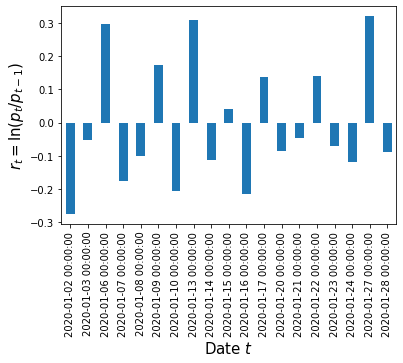

In [65]:
logRet_t = np.log(p_t) - np.log(p_tm1)
logRet_t.name = "log-returns r(t) = log(p(t)/p(t-1))"

logRet_t = logRet_t.dropna()

ax = logRet_t.plot.bar()

ax.set_xlabel("Date $t$", fontsize=15)
ax.set_ylabel("$r_t =  \ln(p_t/p_{t-1})$", fontsize=15)